In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import statistics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
data.shape

(569, 31)

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = data['diagnosis']
x = data.drop('diagnosis',axis =1)

y.replace(to_replace='M',value= 1,inplace=True)
y.replace(to_replace='B',value = 0,inplace=True)

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame if it's different

# Print the range of each column separately
print("Range of each column:")
for column in data.columns:
    column_min =int(data[column].min())
    column_max = int(data[column].max()+1)
    print(f"{column}: {column_min} - {column_max}")


Range of each column:
diagnosis: 0 - 2
radius_mean: 6 - 29
texture_mean: 9 - 40
perimeter_mean: 43 - 189
area_mean: 143 - 2502
smoothness_mean: 0 - 1
compactness_mean: 0 - 1
concavity_mean: 0 - 1
concave points_mean: 0 - 1
symmetry_mean: 0 - 1
fractal_dimension_mean: 0 - 1
radius_se: 0 - 3
texture_se: 0 - 5
perimeter_se: 0 - 22
area_se: 6 - 543
smoothness_se: 0 - 1
compactness_se: 0 - 1
concavity_se: 0 - 1
concave points_se: 0 - 1
symmetry_se: 0 - 1
fractal_dimension_se: 0 - 1
radius_worst: 7 - 37
texture_worst: 12 - 50
perimeter_worst: 50 - 252
area_worst: 185 - 4255
smoothness_worst: 0 - 1
compactness_worst: 0 - 2
concavity_worst: 0 - 2
concave points_worst: 0 - 1
symmetry_worst: 0 - 1
fractal_dimension_worst: 0 - 1


In [ ]:
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

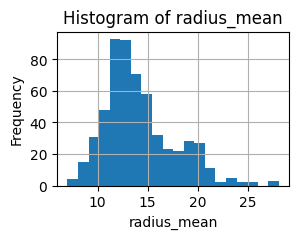

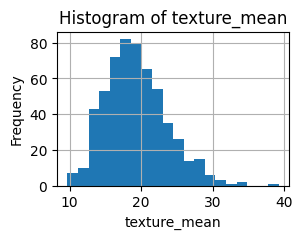

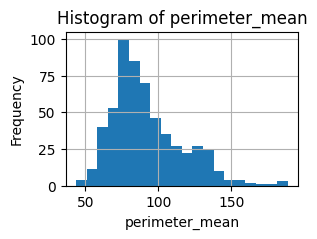

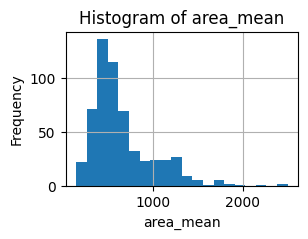

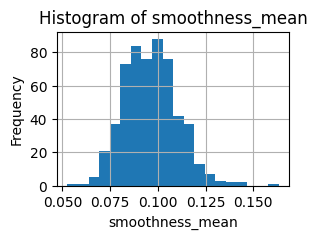

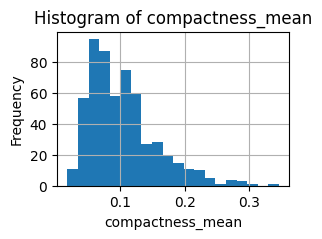

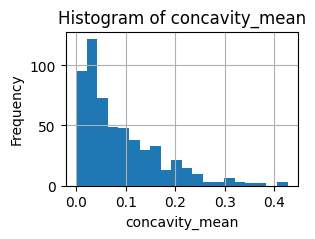

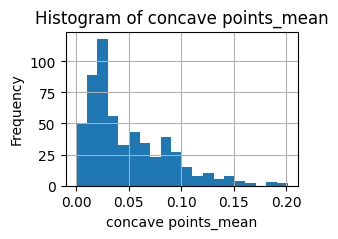

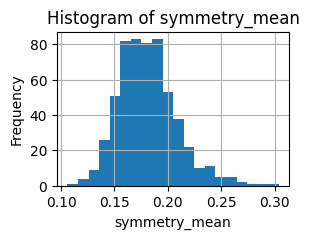

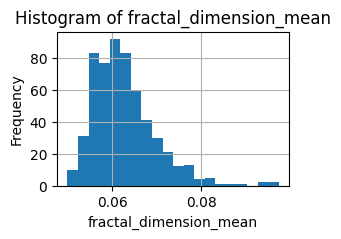

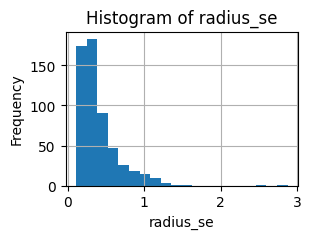

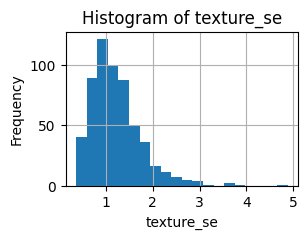

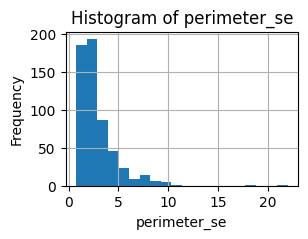

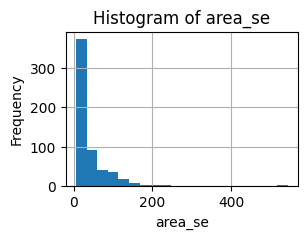

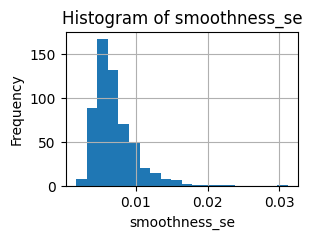

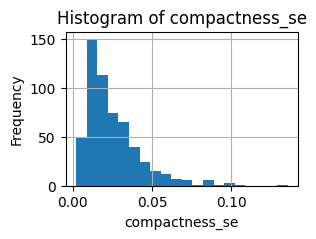

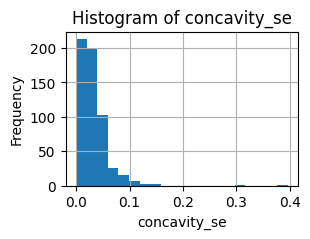

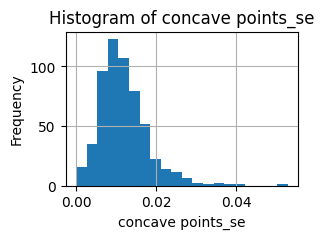

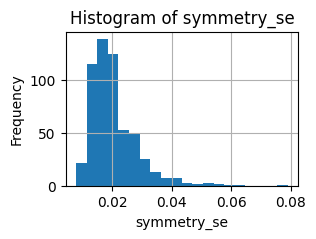

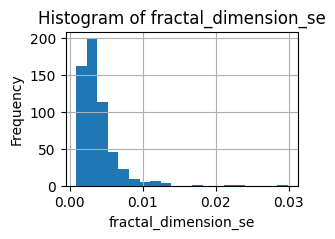

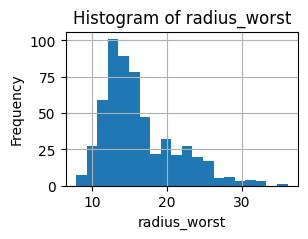

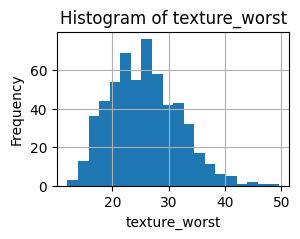

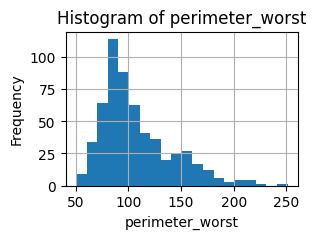

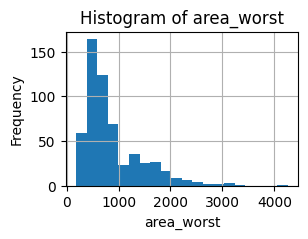

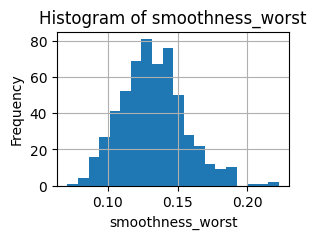

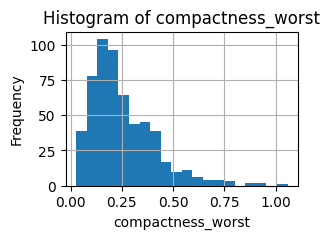

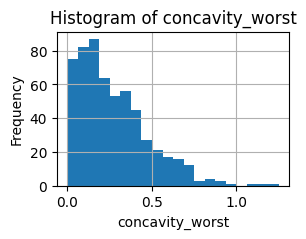

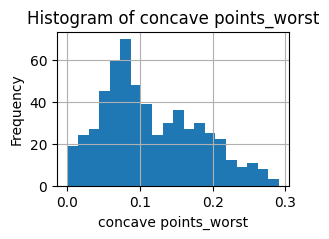

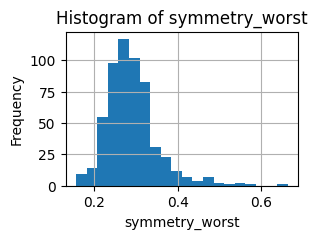

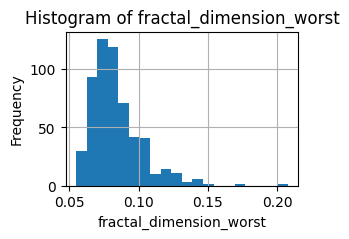

In [ ]:
import matplotlib.pyplot as plt

for column in x.columns:
    plt.figure(figsize=(2, 1))
    plt.hist(x[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


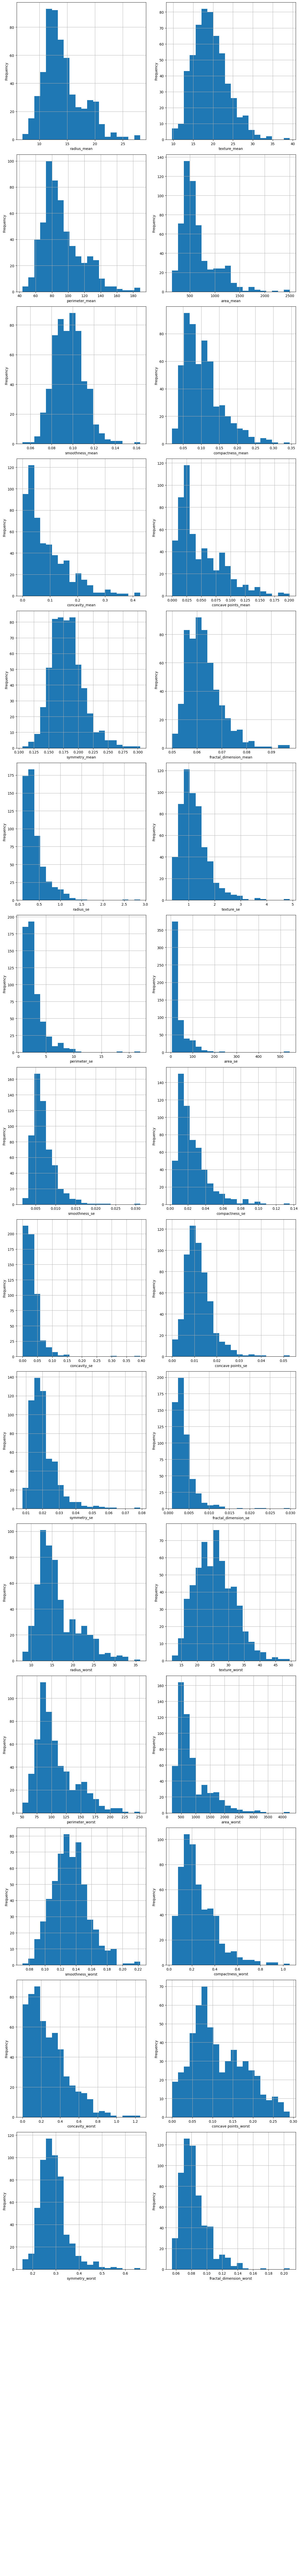

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for subplots
num_cols = len(x.columns)
num_rows = (num_cols + 5) // 2  # Ensure an even number of plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# Flatten the axes array if necessary
axes = axes.flatten()

# Iterate through each column in X and plot
for i, column in enumerate(x.columns):
    axes[i].hist(x[column], bins=20)  # Adjust the number of bins as needed
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
model = MLPClassifier()
scores = cross_val_score(model,x,y,scoring='f1_macro',n_jobs=-1,cv=10, error_score='raise')
print(scores.mean())

0.9262494312725844


In [ ]:
model_used = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_used.fit(x_train, y_train)
y_pred = model_used.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) and False Negatives (FN) from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.9302325581395349


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_used = DecisionTreeClassifier()
selector = RFE(model_used, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)
selected_features = x.columns[selector.support_]
print("Selected features:", selected_features)

model_used.fit(x_train[selected_features], y_train)
y_pred = model_used.predict(x_test[selected_features])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Selected features: Index(['concave points_mean', 'area_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
Accuracy: 0.9298245614035088
F1 Score: 0.9298245614035088


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) and False Negatives (FN) from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.9069767441860465


In [ ]:
def init_population(n,features_count,to_select):
    pop = []
    for i in range(n):
      chr = [0]*features_count
      j = 0
      while(j<to_select):
        p = random.uniform(0,1)
        position = random.randrange(features_count)
        if(p>=0.5 and chr[position]==0):
          chr[position]=1
          j=j+1
      if(sum(chr)==0):
        position = random.randrange(features_count)
        chr[position] = 1

      pop.append(chr)
    print('population is ')
    print(pop, end=" ")
    return pop

In [ ]:
def calculate_fitness(features,target):
    model = MLPClassifier()
    scores = cross_val_score(model,features,target,scoring='f1_macro',n_jobs=-1,cv=10, error_score='raise')
    print(scores.mean())
    return scores.mean()

In [ ]:
def get_fitness(population,data, target):
    fitness_values = []
    for individual in population:
      df = data
      i=0
      for column in data:
        if(individual[i]==0):
          df = df.drop(column,axis=1)
        i=i+1

      features = df
      individual_fitness = calculate_fitness(features,target)
      fitness_values.append(individual_fitness)

    return fitness_values


In [ ]:
def get_fitness_solution(child, data, target):
    df = data.copy()
    for i, column in enumerate(data.columns):
        if child[i] == 0:
            df.drop(column, axis=1, inplace=True)

    features = df
    fitness_value = calculate_fitness(features, target)
    return fitness_value

In [ ]:
def mutated_solution(population,fitness_values,target,x):
  sorted_indices = sorted(range(len(fitness_values)), key=lambda k: fitness_values[k], reverse=True)
  parent1 = population[sorted_indices[0]]
  parent2 = population[sorted_indices[1]]
  chromosome_len = len(parent1)

  start = random.randrange(chromosome_len)
  end = random.randrange(chromosome_len)
  if(start>end):
    start,end = end, start
  child =  parent1[0:start]
  child.extend(parent2[start:end])
  child.extend(parent1[end:])
  index_1 = random.randrange(len(child))
  index_2 = random.randrange(len(child))
  while(index_2==index_1 and child[index_1] != child[index_2]):
        index_2 = random.randrange(len(child))
  temp = child[index_1]
  child[index_1] = child[index_2]
  child[index_2] = temp
  child_fitness = get_fitness_solution(child,x, target)

  return child_fitness,child

In [ ]:
def select_parents(population,fitness_values):
    parents = []
    total = sum(fitness_values)
    norm_fitness_values = [x/total for x in fitness_values]
    cumulative_fitness = []
    start = 0
    for norm_value in norm_fitness_values:
      start+=norm_value
      cumulative_fitness.append(start)

    population_size = len(population)
    for count in range(population_size):
      random_number = random.uniform(0, 1)
      individual_number = 0
      for score in cumulative_fitness:
        if(random_number<=score):
          parents.append(population[individual_number])
          break
        individual_number+=1
    return parents

In [ ]:
def two_point_crossover(parents,probability):
    random.shuffle(parents)

    no_of_pairs = round(len(parents)*probability/2)
    chromosome_len = len(parents[0])
    crossover_population = []

    for num in range(no_of_pairs):
      length = len(parents)
      parent1_index = random.randrange(length)
      parent2_index = random.randrange(length)
      while(parent1_index == parent2_index):
        parent2_index = random.randrange(length)

      start = random.randrange(chromosome_len)
      end = random.randrange(chromosome_len)
      if(start>end):
        start,end = end, start

      parent1 = parents[parent1_index]
      parent2 = parents[parent2_index]
      child1 =  parent1[0:start]
      child1.extend(parent2[start:end])
      child1.extend(parent1[end:])
      child2 =  parent2[0:start]
      child2.extend(parent1[start:end])
      child2.extend(parent2[end:])
      parents.remove(parent1)
      parents.remove(parent2)
      crossover_population.append(child1)
      crossover_population.append(child2)
    if(len(parents)>0):
      for remaining_parents in parents:
        crossover_population.append(remaining_parents)

    return crossover_population


In [ ]:
def mutation(crossover_population):
    for individual in crossover_population:
      index_1 = random.randrange(len(individual))
      index_2 = random.randrange(len(individual))
      while(index_2==index_1 and individual[index_1] != individual[index_2]):
        index_2 = random.randrange(len(individual))
      temp = individual[index_1]
      individual[index_1] = individual[index_2]
      individual[index_2] = temp

    return crossover_population

In [ ]:
def genetic_algo(data, features, target, population_size, top_number):
  c = data.shape[1]
  population = init_population(population_size, c, top_number)
  fitness_values = get_fitness(population, data, target)
  parents = select_parents(population, fitness_values)
  crossover_population = two_point_crossover(parents, 0.78)
  population = crossover_population
  gen = 1
  best_fitness,best_Solution = mutated_solution(population,fitness_values,target,data)
  print("best_Solution", best_fitness)
  while(best_fitness<0.935):
    print("Generation :", gen)
    parents = select_parents(population, fitness_values)
    crossover_population = two_point_crossover(parents, 0.78)
    population = crossover_population
    p = random.uniform(0, 1)
    if (p <= 0.001):
      mutated_population = mutation(crossover_population)
      population = mutated_population
    fitness_values = get_fitness(population, data, target)
    best_fitness,best_Solution = mutated_solution(population,fitness_values,target,data)
    print("best_Solution", best_fitness)
    gen += 1


  return best_Solution, best_fitness

In [ ]:
top_features, best_f1_score = genetic_algo(x,x,y,40,10)

population is 
[[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 

In [ ]:
i = 0
list_of_features= []
for i in range(len(top_features)):
  if(top_features[i]==1):
    list_of_features.append(x.columns[i])

print(top_features)
print(list_of_features)
print(best_f1_score)

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
['radius_mean', 'symmetry_mean', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst']
0.9409655090798641


In [ ]:
len(list_of_features)

23

In [ ]:
X= ['radius_mean', 'symmetry_mean', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst']
model_used = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x[X], y, test_size=0.2, random_state=42)
model_used.fit(x_train, y_train)
y_pred = model_used.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP) and False Negatives (FN) from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.9069767441860465


In [ ]:
result_graph = {
    'Without_feature_selection': {'Accuracy':  0.9298245614035088 , 'F1 Score': 0.9262494312725844, 'Senstivity': 0.9302325581395349},
    'RFE': {'Accuracy': 0.9298245614035088 , 'F1 Score': 0.9298245614035088, 'Senstivity': 0.9069767441860465},
    'GA': {'Accuracy': 0.9473684210526315, 'F1 Score': 0.9409655090798641, 'Senstivity': 0.9069767441860465}
}


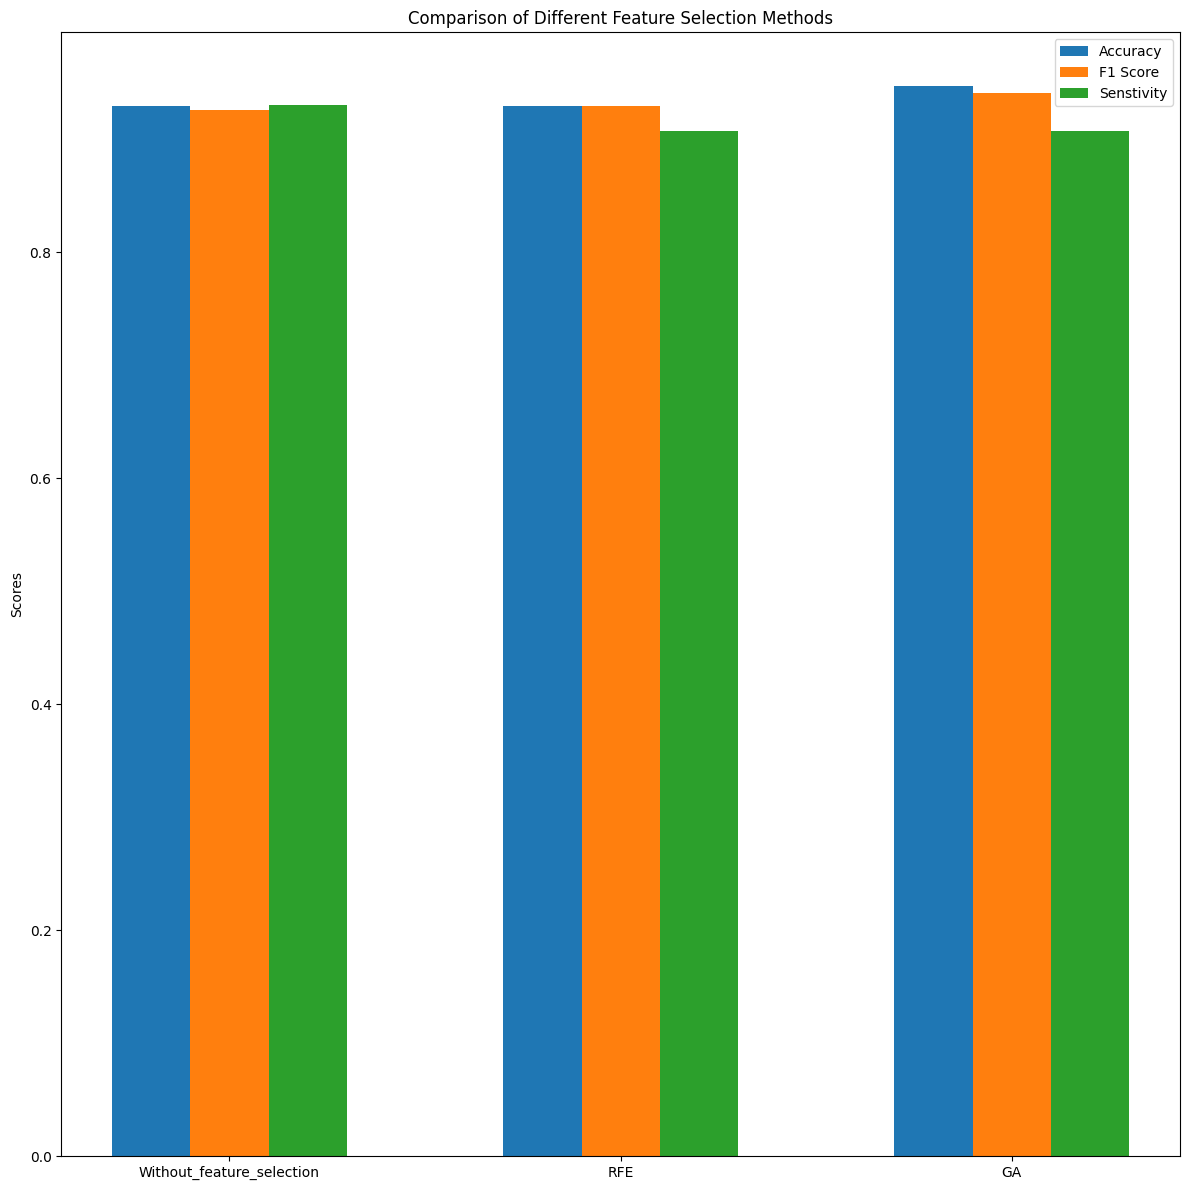

In [ ]:
import matplotlib.pyplot as plt

# Extracting labels and data
labels = list(result_graph.keys())
metrics = list(result_graph[labels[0]].keys())
data = {metric: [result_graph[label][metric] for label in labels] for metric in metrics}

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

x = range(len(labels))
width = 0.2

for i, (metric, values) in enumerate(data.items()):
    ax.bar([pos + i * width for pos in x], values, width=width, label=metric)

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Feature Selection Methods')
ax.legend()

plt.tight_layout()
plt.show()
